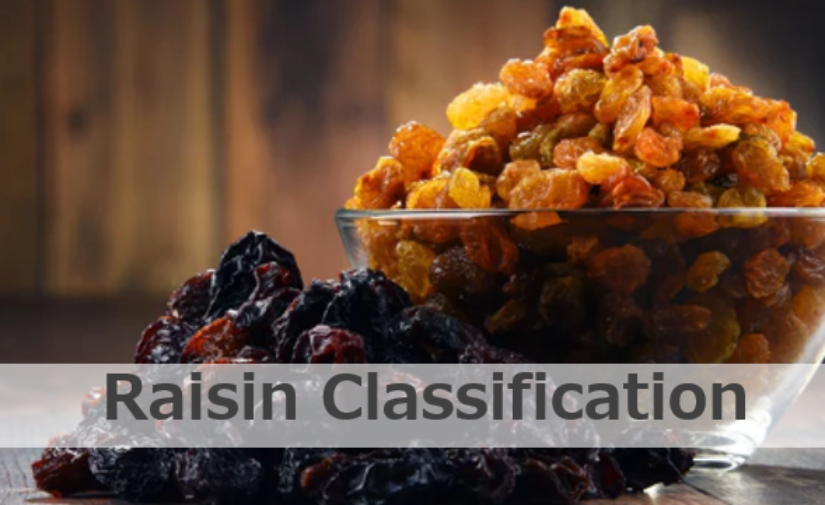

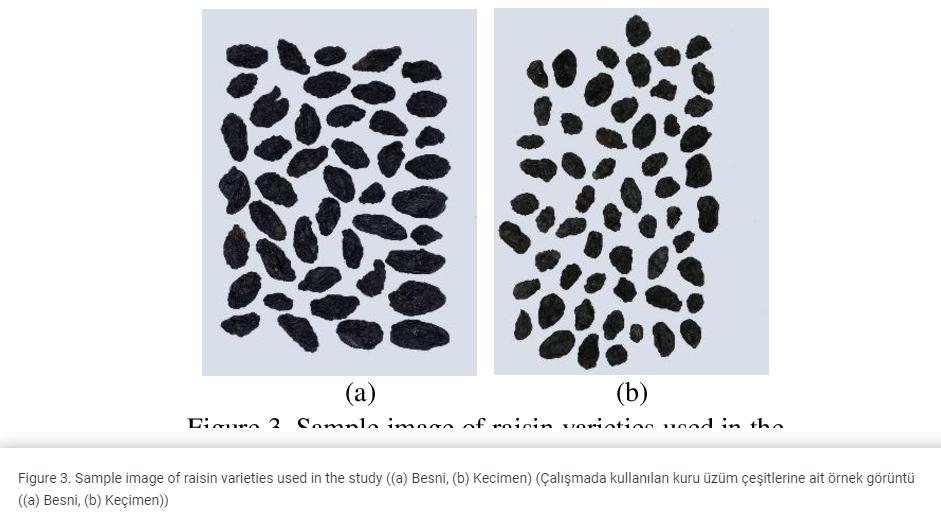

# <font color='green'> <b>Exploratory Data Analysis (EDA) and Visualization</b><font color='black'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf   # !pip install cufflinks

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [85]:
df = pd.read_excel("Raisin_Dataset.xlsx")  

In [87]:
df  # Classlar 0-1 değil !!

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2    0.637613   1208.575  Kecimen  
3    0.699599    844.162  Kecimen  
4    0.792772   1073.251  Kecimen  
..        ...        ...      ...  
895  0.668793   1129.072    Besni  
896  0.636476   1214.252    Besni  
897  0.741099   1292.828    Besni  
898  0.658798   1258.548    Besni  
899  0.632020   1272.862    Besni  

[900 rows x 8 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.shape

(900, 8)

In [6]:
df.duplicated().sum()  

0

In [7]:
df.isnull().sum().any()  

False

In [8]:
df.describe().T

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

In [9]:
df["Class"].value_counts()  

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

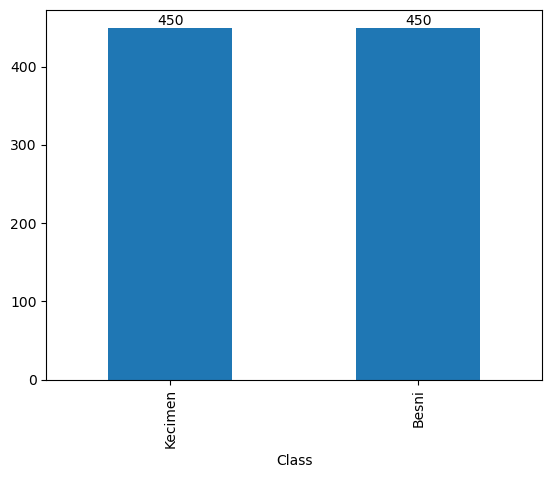

In [10]:
ax = df["Class"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]); 



In [11]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) 

# Kecimeni 0 Besniyi 1 olacak şekilde mapledik
# Bu şekilde yapmasak da olurdu, direkt isimler ile de tahmin alabiliriz

In [12]:
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class  
0    0.758651   1184.040      0  
1    0.684130   1121.786      0  
2    0.637613   1208.575      0  
3    0.699599    844.162      0  
4    0.792772   1073.251      0  
..        ...        ...    ...  
895  0.668793   1129.072      1  
896  0.636476   1214.252      1  
897  0.741099   1292.828      1  
898  0.658798   1258.548      1  
899  0.632020   1272.862      1  

[900 rows x 8 columns]

In [ ]:
# features = df.columns[:-1]
# for i in features:
#     fig = px.box(df, x=i)
#     fig.show()

In [13]:
df.iloc[:,:-1].iplot(kind="box")



In [14]:
fig = px.box(df, color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()



In [15]:
df.iplot(kind="bar")  

# tüm feature lara bakalım
# 0: Keçimen , 1: Besni
# Eksantriklik, Kapsam (ayırt edici bir özellik değil)

# datamızdaki ilk 450 gözlem:0 dı =Kecimen
# son 450 gözlem ise 1 = Besni

In [16]:
fig = px.bar(df,x=df.index,y="Area",color="Class",color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show();

# ayrıntılı olarak area ve class a bakıyoruz
# gayet ayırtedici

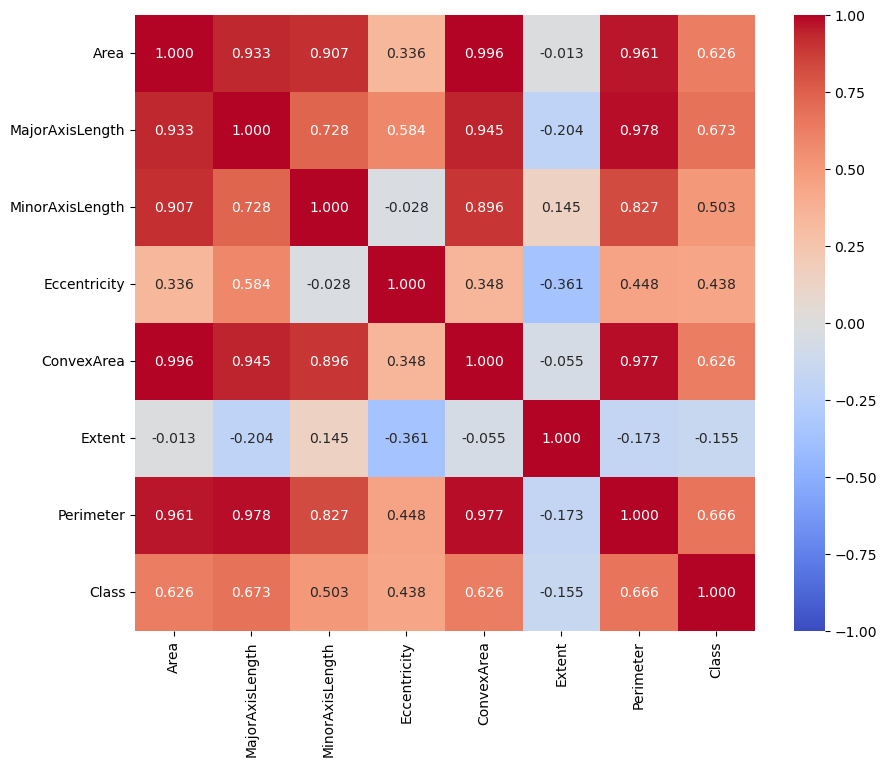

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='coolwarm');

# multikolinarity durumu var gibi gözükmekte
# logistik regresyonda multikolinarity problem mi? 
# multikolinarity linear regresyon için problemdi

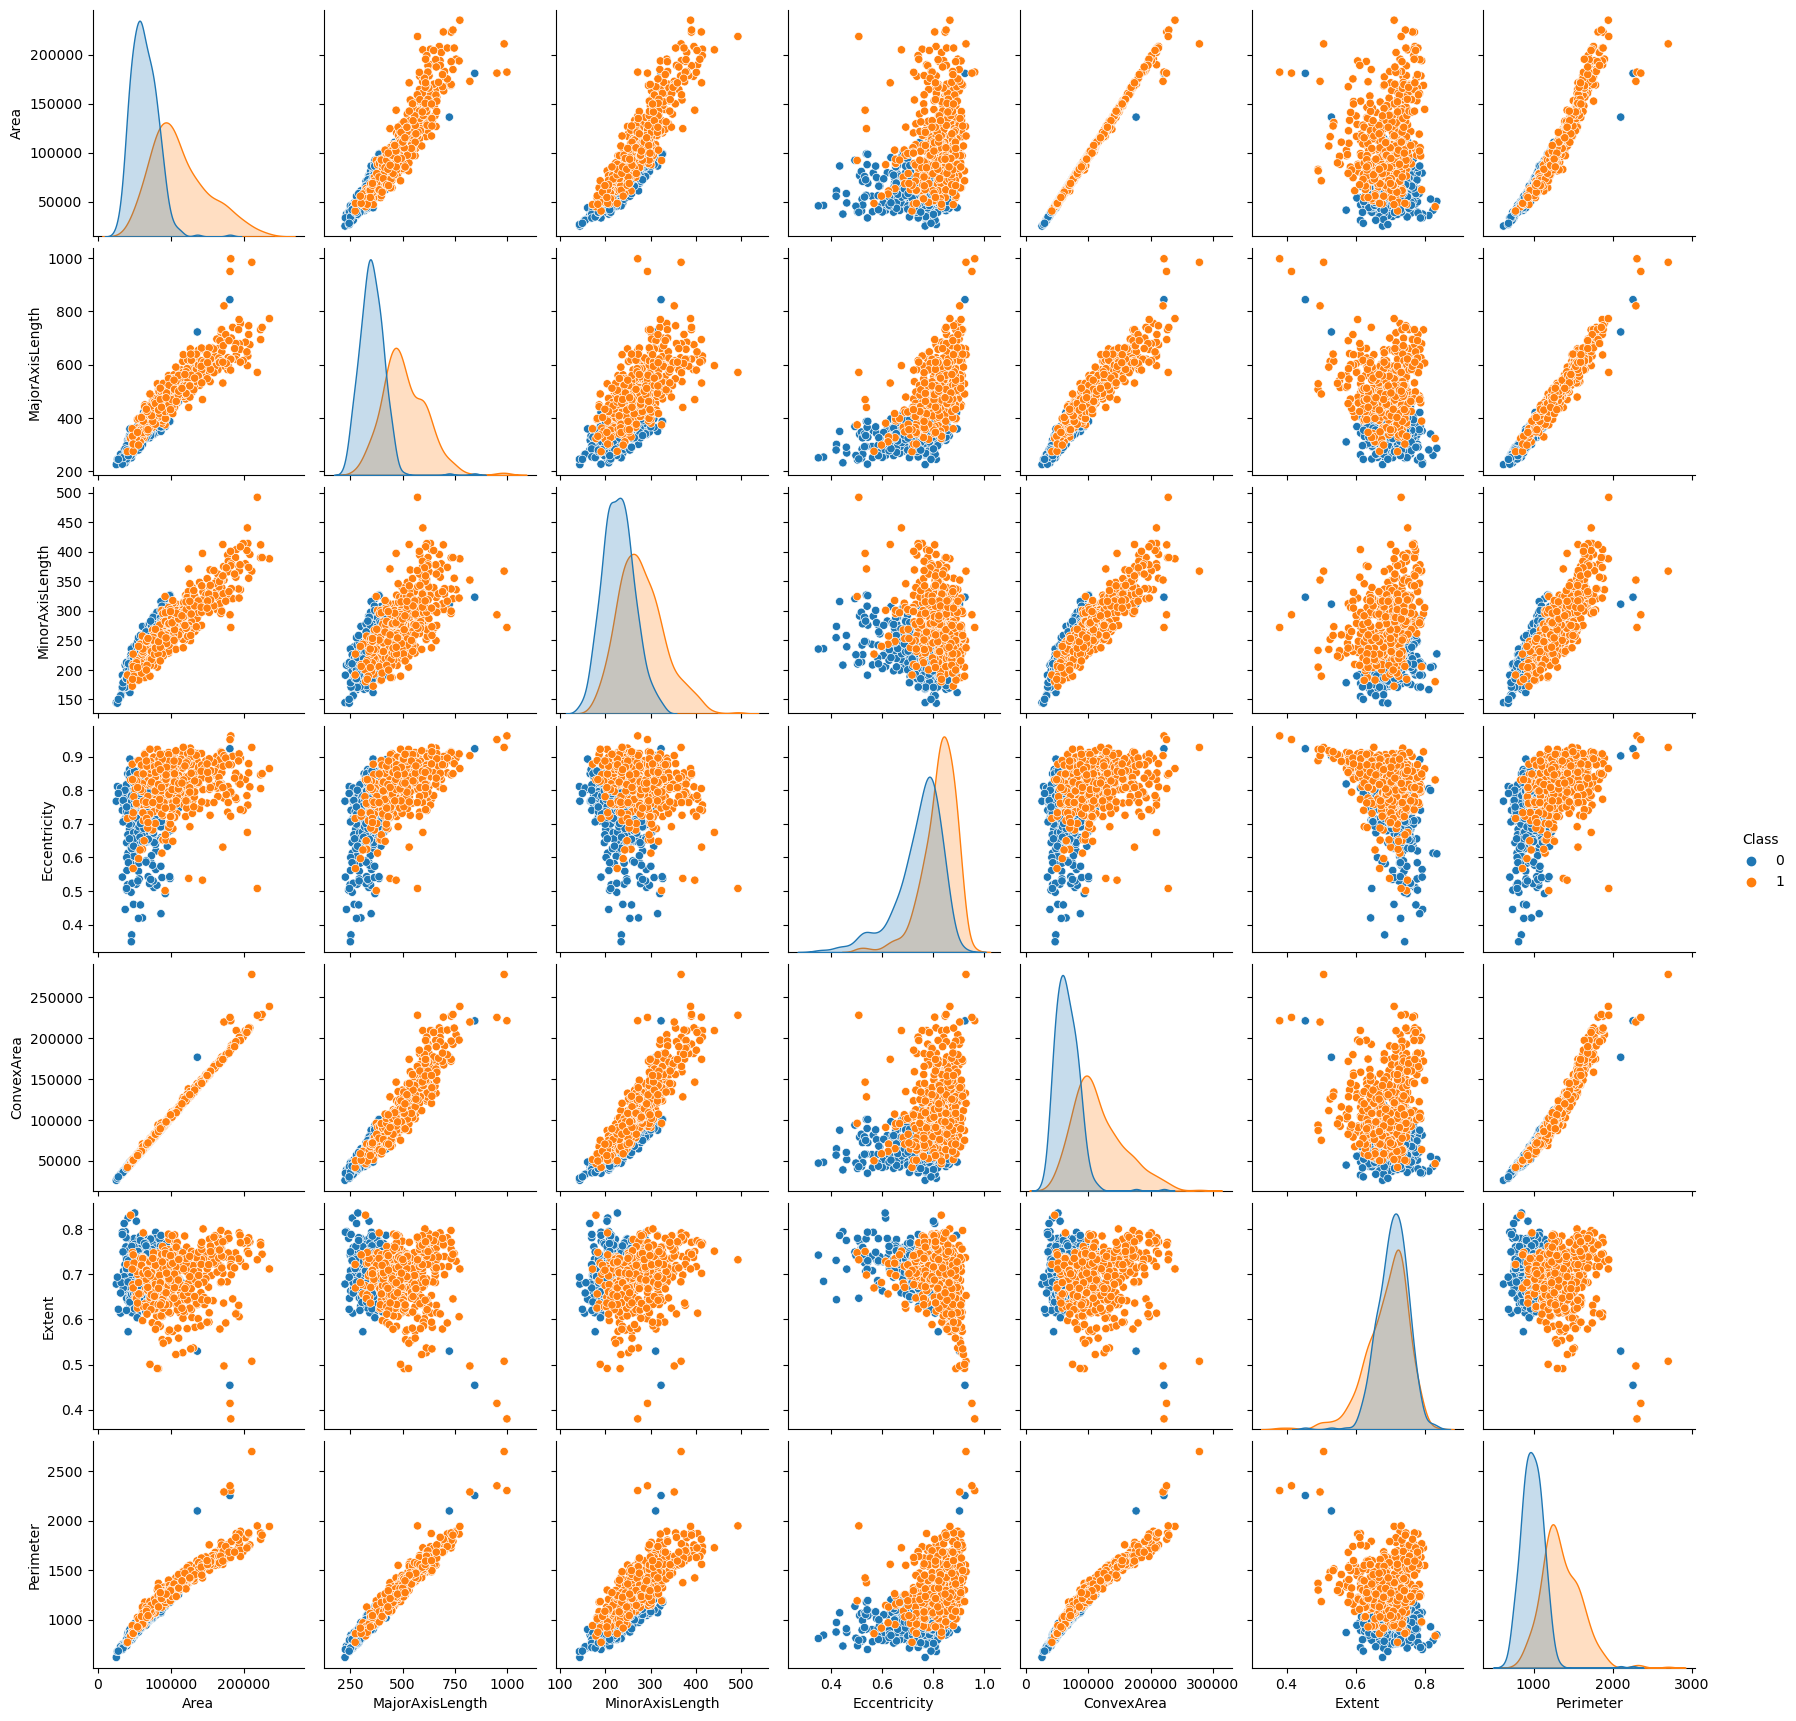

In [19]:
sns.pairplot(df, hue = "Class");

# classların birbirinden net bir şekilde ayrıştığı yer göremiyorum
# ama iki boyutlu baktığımızı unutmayalım

In [20]:
fig = px.scatter_3d(df, x='Perimeter', y='Area', z='Extent', color='Class')
fig.show()

# üç boyutlu bakarsak classların aslında birbirinden iyi bir şekilde ayrıldığını ama modelimizin
# hata yapabileceği grift noktaların da olduğunu görüyoruz

# <font color='green'> <b>Logistic Regression Model</b><font color='black'>

## <font color='blue'> <b>Train | Test Split and Scaling</b><font color='black'>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [22]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=10)

# stratify=y balanced datalarda kullanmaya gerek yok

## <font color='blue'> <b>Logistic Regression with Pipeline</b><font color='black'>

In [29]:
scaler = StandardScaler()

In [30]:
log_model = LogisticRegression()

In [31]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) 

In [32]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [33]:
# operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
# pipe_model = Pipeline(steps=operations)
# pipe_model.fit(X_train, y_train)

In [34]:
y_pred = log_pipe.predict(X_test)
y_pred

# predict test datasının hangi classlara ait olduğunu tahmin eder.

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0], dtype=int64)

In [35]:
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

# predict_proba test datasındaki gözlemlerin hangi olasılıkla hangi sınıfa atandığını gösterir. İlk değer 0 sınıfına
# ait olma olasılığı iken ikinci değer 1 sınıfına ait olma olasılığını gösterir. Hangi değer büyükse o sınıfa atanır. 

array([[9.09233226e-01, 9.07667744e-02],
       [2.13923600e-01, 7.86076400e-01],
       [8.61366061e-01, 1.38633939e-01],
       [9.75006614e-01, 2.49933859e-02],
       [7.18428741e-01, 2.81571259e-01],
       [9.78090204e-01, 2.19097960e-02],
       [9.67153729e-01, 3.28462709e-02],
       [2.69784269e-01, 7.30215731e-01],
       [6.22413524e-01, 3.77586476e-01],
       [8.28165778e-01, 1.71834222e-01],
       [5.50087417e-01, 4.49912583e-01],
       [6.48124125e-01, 3.51875875e-01],
       [1.33636635e-03, 9.98663634e-01],
       [7.34673174e-03, 9.92653268e-01],
       [2.22192344e-04, 9.99777808e-01],
       [4.06025195e-03, 9.95939748e-01],
       [1.03563509e-04, 9.99896436e-01],
       [2.05679569e-01, 7.94320431e-01],
       [8.80378670e-01, 1.19621330e-01],
       [7.27309014e-01, 2.72690986e-01],
       [9.54065988e-01, 4.59340125e-02],
       [6.00635256e-04, 9.99399365e-01],
       [7.48381106e-01, 2.51618894e-01],
       [9.86770325e-01, 1.32296753e-02],
       [2.814178

In [36]:
# # MinMaxScaler ile bir pipeline
# pipeline_minmax = Pipeline([
#     ('scaler', MinMaxScaler()),
#     ('log_model', log_model)
# ])

# # StandardScaler ile bir pipeline
# pipeline_standard = Pipeline([
#     ('scaler', StandardScaler()),
#     ('log_model', log_model)
# ])

## <font color='blue'> <b>X_test + y_yest + y_pred + y_pred_proba</b><font color='black'>

In [37]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

# Öncelikle X_test ve y_test concate ederek test_data df'ini elde ediyoruz.

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
375   65999       326.298721       264.414877      0.585952       67971   
793   76708       458.044640       216.340932      0.881430       78694   
360   48809       332.264893       190.351365      0.819632       51847   
77    42637       293.429580       189.432158      0.763693       44052   
686   61539       364.255945       220.362020      0.796252       65462   
..      ...              ...              ...           ...         ...   
73    68520       373.235638       237.041523      0.772431       70759   
62    78571       443.822291       228.757615      0.856934       81718   
292   72219       376.650492       249.529454      0.749065       74373   
508  133101       641.509739       265.313970      0.910469      136793   
112   51448       328.289568       202.160370      0.787903       52772   

       Extent  Perimeter  Class  
375  0.676864    998.793      0  
793  0.658393   1135.680      1  
360  0.661342    928.016      0  
77   0.725119    814.182      0  
686  0.723392   1056.491      1  
..        ...        ...    ...  
73   0.712859   1049.093      0  
62   0.642193   1157.330      0  
292  0.777795   1050.221      0  
508  0.582496   1544.712      1  
112  0.704806    877.799      0  

[180 rows x 8 columns]

In [38]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

# Ve test_data df'ine 1 sınıfına ait olma olasılıklarını gösteren pred_proba sütununu/feature ını ilave ediyoruz.

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
375   65999       326.298721       264.414877      0.585952       67971   
793   76708       458.044640       216.340932      0.881430       78694   
360   48809       332.264893       190.351365      0.819632       51847   
77    42637       293.429580       189.432158      0.763693       44052   
686   61539       364.255945       220.362020      0.796252       65462   
..      ...              ...              ...           ...         ...   
73    68520       373.235638       237.041523      0.772431       70759   
62    78571       443.822291       228.757615      0.856934       81718   
292   72219       376.650492       249.529454      0.749065       74373   
508  133101       641.509739       265.313970      0.910469      136793   
112   51448       328.289568       202.160370      0.787903       52772   

       Extent  Perimeter  Class  pred_proba  
375  0.676864    998.793      0    0.090767  
793  0.658393   1135.680      1    0.786076  
360  0.661342    928.016      0    0.138634  
77   0.725119    814.182      0    0.024993  
686  0.723392   1056.491      1    0.281571  
..        ...        ...    ...         ...  
73   0.712859   1049.093      0    0.241597  
62   0.642193   1157.330      0    0.777250  
292  0.777795   1050.221      0    0.169532  
508  0.582496   1544.712      1    0.999524  
112  0.704806    877.799      0    0.057765  

[180 rows x 9 columns]

In [39]:
test_data["pred"] = y_pred
test_data

# Model predict işlemini yaparken arka planda 0.5 ve 0.5'den büyük olan olasılıkları 1 classına, 0.5'den küçük olan
# olasılıkları ise 0 classına atıyor. Modelin yaptığı predictionları pred feature olarak test_data df'ine ilave ediyoruz.

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
375   65999       326.298721       264.414877      0.585952       67971   
793   76708       458.044640       216.340932      0.881430       78694   
360   48809       332.264893       190.351365      0.819632       51847   
77    42637       293.429580       189.432158      0.763693       44052   
686   61539       364.255945       220.362020      0.796252       65462   
..      ...              ...              ...           ...         ...   
73    68520       373.235638       237.041523      0.772431       70759   
62    78571       443.822291       228.757615      0.856934       81718   
292   72219       376.650492       249.529454      0.749065       74373   
508  133101       641.509739       265.313970      0.910469      136793   
112   51448       328.289568       202.160370      0.787903       52772   

       Extent  Perimeter  Class  pred_proba  pred  
375  0.676864    998.793      0    0.090767     0  
793  0.658393   1135.680      1    0.786076     1  
360  0.661342    928.016      0    0.138634     0  
77   0.725119    814.182      0    0.024993     0  
686  0.723392   1056.491      1    0.281571     0  
..        ...        ...    ...         ...   ...  
73   0.712859   1049.093      0    0.241597     0  
62   0.642193   1157.330      0    0.777250     1  
292  0.777795   1050.221      0    0.169532     0  
508  0.582496   1544.712      1    0.999524     1  
112  0.704806    877.799      0    0.057765     0  

[180 rows x 10 columns]

In [40]:
test_data.sample(10)

# df'den rastgele 10 tane gözlem seçiyoruz

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
352   46601       277.353280       216.272051      0.626065       48457   
243   59514       368.637909       209.126925      0.823514       61469   
246   46120       300.097158       201.206314      0.741936       49996   
203   73193       401.072302       235.828993      0.808864       75563   
71    60449       383.800250       208.168783      0.840128       64346   
413   55129       336.021702       210.428066      0.779636       56855   
409  104921       452.863013       297.024187      0.754864      108211   
520  155702       655.398966       304.612149      0.885430      160709   
666  178692       594.722171       384.038046      0.763554      181288   
342   57612       352.441365       210.064210      0.802965       58810   

       Extent  Perimeter  Class  pred_proba  pred  
352  0.761653    820.106      0    0.014705     0  
243  0.755158    968.360      0    0.144181     0  
246  0.628972    907.025      0    0.086675     0  
203  0.740116   1050.909      0    0.286707     0  
71   0.676345   1054.198      0    0.410496     0  
413  0.750402    910.837      0    0.063333     0  
409  0.726298   1254.861      0    0.730216     1  
520  0.697046   1626.909      1    0.999554     1  
666  0.747046   1622.032      1    0.995940     1  
342  0.647719    934.684      0    0.137725     0

## <font color='blue'> <b>Model Performance</b><font color='black'>

In [41]:
accuracy_score(y_test,y_pred)

# Bu metric datamda gerçek değerlerin ne kadarını doğru bildiğimi gösteriyor

0.8722222222222222

In [42]:
log_pipe.score(X_test, y_test)

# score fonksiyonu içine X_test, y_test verdiğimizde accuracy scoru döndürür.
# her 1000 tahminden 872 tanesi doğru

0.8722222222222222

In [43]:
precision_score(y_test, y_pred, pos_label=1)


0.8941176470588236

In [44]:
precision_score(y_test, y_pred, pos_label=0)



0.8526315789473684

In [45]:
recall_score(y_test, y_pred,  pos_label=1)



0.8444444444444444

In [46]:
recall_score(y_test, y_pred,  pos_label=0)

0.9

In [47]:
f1_score(y_test,y_pred, pos_label=1)

# precision ve recall scorlarının harmonic ortalamasını döndürür. 
# Precision ve recall scorları arasında her zaman bir trade-off vardır.
# precision artarsa/azalırsa recall azalır/artar.

0.8685714285714287

In [48]:
f1_score(y_test,y_pred, pos_label=0)

0.8756756756756757

In [49]:
confusion_matrix(y_test,y_pred)

# confusion_matrix sade gösterimidir. True label ve predicted label eksenleri gösterilmediğinden kafa karışıklığına 
# neden olabilir.

array([[81,  9],
       [14, 76]], dtype=int64)

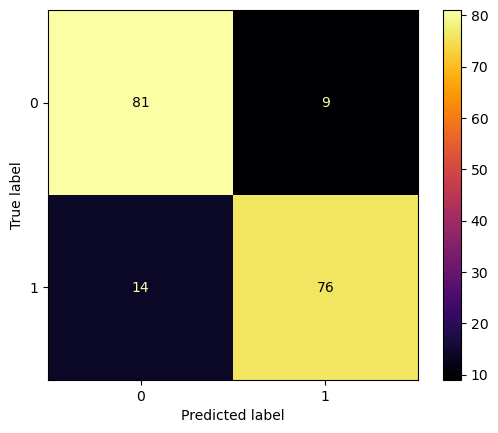

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_pipe, X_test, y_test, cmap="inferno")

# True label ve predicted label eksenleri gösterildiğinden yorumlanması daha kolaydır.
# TP, FP, TN, FN confusion matrix üzerinden çıkarılır.

# plot_confusion_matrix(log_pipe, X_test, y_test);

**plasma-inferno-magma-cividis-Greys-Blues-PuBu-YlGnBu-hot**

https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [51]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# hem train hem de test seti scorlarını gözlemleyebilmek için eval_metric fornksiyonumuzu tanımlıyoruz.

In [52]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 



Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [53]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
print(scorers)

# from sklearn.metrics import SCORERS
# SCORERS.keys()

# Classification modelleri için yapacağımız cross_validation ve gridsearchcv için kullanacağımız metriclerin listesi

# Bu listeden 'accuracy', 'precision','recall','f1' metriclerini alacağız.

# Cross validation ve gridsearchCV işlemlerinde kullanabileceğimiz metric isimleri aşağıdaki şekliyle yazılmalı
# aksi taktirde hata alırsınız.

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [54]:
model = Pipeline([("scaler",scaler),("log_model",log_model)])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# cross_validation üzerinden kesin overfiting/underfiting kararını verebilmek için her iterasyonda hem train hem de validation
# seti scorlarını karşılaştırabilmek için return_train_score=True olarak düzenliyoruz.

# Aşağıda döndürülen scorlar her zaman 1 clasına ait scorlardır. 0 clasına ait metriclerin CV scorları için ilave
# başka işlemler yapmamız gerekiyor.


fit_time  score_time  test_precision  train_precision  test_recall  \
1   0.025986    0.025985        0.935484         0.881789     0.805556   
2   0.021987    0.020988        0.857143         0.878981     0.833333   
3   0.023986    0.021987        0.842105         0.887097     0.888889   
4   0.021987    0.019989        0.767442         0.879365     0.916667   
5   0.023987    0.023986        0.933333         0.876972     0.777778   
6   0.029983    0.025985        0.903226         0.869159     0.777778   
7   0.024987    0.021018        0.942857         0.875399     0.916667   
8   0.023988    0.028023        0.804878         0.882166     0.916667   
9   0.026984    0.025016        0.857143         0.871069     0.833333   
10  0.025016    0.023018        0.967742         0.875796     0.833333   

    train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1       0.851852  0.865672  0.866562       0.875000        0.868827  
2       0.851852  0.845070  0.865204       0.847222        0.867284  
3       0.848765  0.864865  0.867508       0.861111        0.870370  
4       0.854938  0.835443  0.866980       0.819444        0.868827  
5       0.858025  0.848485  0.867395       0.861111        0.868827  
6       0.861111  0.835821  0.865116       0.847222        0.865741  
7       0.845679  0.929577  0.860283       0.930556        0.862654  
8       0.854938  0.857143  0.868339       0.847222        0.870370  
9       0.854938  0.845070  0.862928       0.847222        0.864198  
10      0.848765  0.895522  0.862069       0.902778        0.864198

In [55]:
df_scores.mean()[2:]  

# 1 labelına ait olan train ve validation scorları bu aşamada karşılaştırılıp kesin overfiting/undefiting 
# kararı veriliyor. Aşağıdaki scorlara göre overfiting olmadığını söyleyebiliriz.

test_precision     0.881135
train_precision    0.877779
test_recall        0.850000
train_recall       0.853086
test_f1            0.862267
train_f1           0.865238
test_accuracy      0.863889
train_accuracy     0.867130
dtype: float64

In [56]:
# yukardaki skorları kıyaslamak için koyduk

eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

# Burdan aldığımız scorlar modelin kesin ve nihai scorlarıdır. 
# Bu scorların gerçekten tutarlı scorlar olup olmadığına CV'dan aldığımız validation seti scorları ile 
# karşılaştırarak karar veriyoruz. 
# Eğer scorlar birbirene yakınsa test datasının scorları tutarlıdır diyebiliriz.

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [57]:
log_pipe.get_params()

# gridsearchCV içerisinde eğer pipeline modeli kullanacaksak pipeline içerisine tanımlanmış olan ML algoritmasına ait
# hyper_parametrelerin listesini get_params() ile görebiliyoruz.

# gridsearchCv nin param_grid parametresinin içine yazacağımız hyper_parametreleri aşağıda belirtildiği haliyle yazmalıyız

# Dikkaet ederseniz pipeline içerisinde ML modeline verdiğimiz "log_model" isminden sonra 2 tane alt tire(__) sonra
# ML modelinin kendi hyper parametre isminin yazdığına dikkat edin.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('log_model', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'log_model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log_model__C': 1.0,
 'log_model__class_weight': None,
 'log_model__dual': False,
 'log_model__fit_intercept': True,
 'log_model__intercept_scaling': 1,
 'log_model__l1_ratio': None,
 'log_model__max_iter': 100,
 'log_model__multi_class': 'auto',
 'log_model__n_jobs': None,
 'log_model__penalty': 'l2',
 'log_model__random_state': None,
 'log_model__solver': 'lbfgs',
 'log_model__tol': 0.0001,
 'log_model__verbose': 0,
 'log_model__warm_start': False}

Logistic Regression Hyperparametreleri : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# pipeline for logistic regression

model = Pipeline([("scaler", scaler), ("log_model", log_model)])

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]

# -1 ile 5 arasında 20 tane C değeri elde etmek için
# C arttıkça regülarizasyon düşer, alphanın tersi olarak
# C için np.logspace kullanmanın nedeni, regülarizasyonun optimal değerinin genellikle belirli bir aralıkta olmamasıdır.
# Bu nedenle, geniş bir aralıkta farklı değerleri denemek ve en iyi sonucu veren değeri bulmak için logaritmik bir ölçekte
# değerler oluşturmak mantıklıdır.
C = np.logspace(-1, 5, 20)

# balanced: sınıf ağırlıkları dengeli, None: sınıf ağırlığı yok
class_weight = ["balanced", None]
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# solver ın dört değeri
solver = ["lbfgs", "liblinear", "sag", "saga"]

# penalty, C, class_weight ve solver'ın tüm kombinasyonlarını elde etmek için
param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C, 1],  # hata alan alanlar "log_model__C" : C, yapsınlar
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}

# en iyi modeli elde etmek için
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',  # Default olarak 1 sınıfının scorunu max. eder    
    n_jobs=-1)  # bütün işlemciler burda çalışsın diye

# GridsearchCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [60]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [61]:
grid_model.best_params_

# best_params_ param_grid içerisine tanımladığım tüm hyper_parametre uzayları içerisindeki 
# en iyi hyper_parameter değerlerini döndürür.

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [62]:
grid_model.best_index_

# en iyi scorun alındığı df indexini döndürür.

17

In [63]:
grid_model.best_score_

0.8652777777777778

In [64]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

# test seti doğruluğu 0,87'den 0,88'e yükseldi, 21 yanlış tahmin
# yukardaki test setine göre 1 puan artmış, hata sayısı da 23den 21e düşmüş

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[316  44]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.87      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## <font color='blue'> <b>Precision-Recall Curve & ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b><font color='black'>

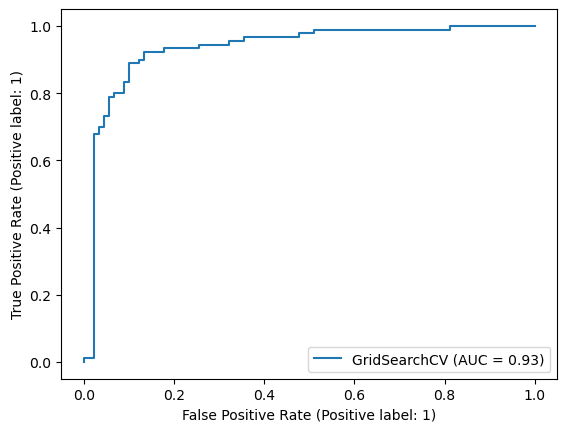

In [65]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

# Modelim iki üzüm türünü hangi ölçüde ayrıştırabiliyor

# datam dengeli olduğundan AUC scoruna bakıyoruz. AUC =0.93 modelim 1 labelını 0 labelından
# ayrıştırmada ortalama %93 oranında başarılı demek.

# gridsearch yaptıktan sonraki hali

# plot_roc_curve(grid_model, X_test, y_test); 

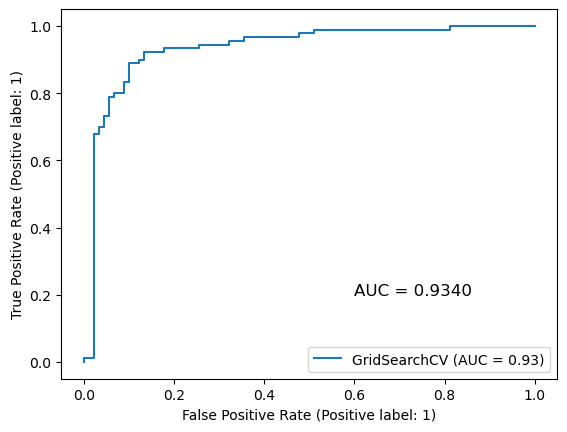

In [66]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

plt.text(0.6, 0.2, f'AUC = {auc:.4f}', fontsize=12)
plt.show()

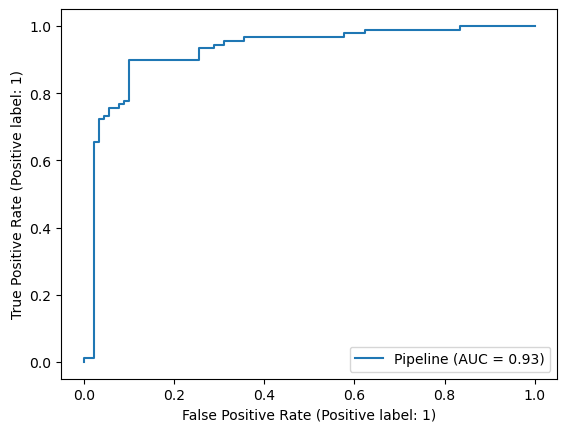

In [67]:
RocCurveDisplay.from_estimator(log_pipe, X_test, y_test);

# gridsearch yapmadan önceki hali

# plot_roc_curve(log_pipe, X_test, y_test); 

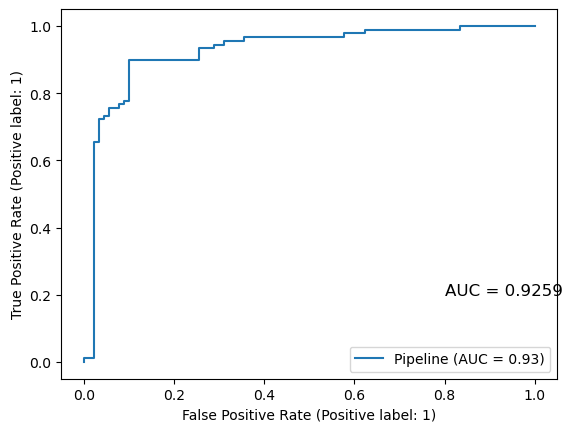

In [68]:
y_pred_proba = log_pipe.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

RocCurveDisplay.from_estimator(log_pipe, X_test, y_test)

plt.text(0.8, 0.2, f'AUC = {auc:.4f}', fontsize=12)
plt.show()

In [69]:
from sklearn.metrics import precision_recall_curve

# 'log_pipe' adlı sınıflandırma modeli ile Precision-Recall eğrisini hesapla
precision, recall, thresholds = precision_recall_curve(y_test, log_pipe.predict_proba(X_test)[:, 1])

# Precision ve Recall değerlerini ve eşikleri görüntüle
print("Precision:", precision)
print("Recall:", recall)
print("Thresholds:", thresholds)

Precision: [0.5        0.5027933  0.50561798 0.50847458 0.51136364 0.51428571
 0.51724138 0.52023121 0.52325581 0.52631579 0.52941176 0.53254438
 0.53571429 0.53892216 0.54216867 0.54545455 0.54268293 0.54601227
 0.54938272 0.55279503 0.55625    0.55974843 0.56329114 0.56687898
 0.57051282 0.57419355 0.57792208 0.58169935 0.58552632 0.58940397
 0.59333333 0.59731544 0.60135135 0.60544218 0.60958904 0.6137931
 0.61111111 0.61538462 0.61971831 0.62411348 0.62857143 0.62589928
 0.63043478 0.6350365  0.63970588 0.64444444 0.64925373 0.65413534
 0.65909091 0.66412214 0.66923077 0.6744186  0.6796875  0.68503937
 0.69047619 0.696      0.7016129  0.70731707 0.71311475 0.71900826
 0.725      0.73109244 0.72881356 0.73504274 0.74137931 0.74782609
 0.75438596 0.75221239 0.75892857 0.76576577 0.76363636 0.7706422
 0.77777778 0.78504673 0.78301887 0.78095238 0.77884615 0.78640777
 0.79411765 0.8019802  0.81       0.81818182 0.82653061 0.83505155
 0.84375    0.85263158 0.86170213 0.87096774 0.880434

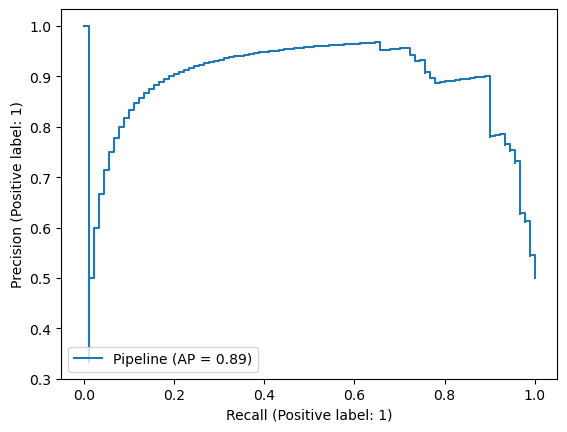

In [72]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(log_pipe, X_test, y_test)

# dengeli data setlerinde hem AUC score hem de Average precision score birbirlerine yakın değerler döndürse de
# dengeli data setleri için AUC, dengesiz veri setleri için average precision scorlarını kullanmayı alışkanlık haline getirelim

# plot_precision_recall_curve(log_pipe, X_test, y_test);

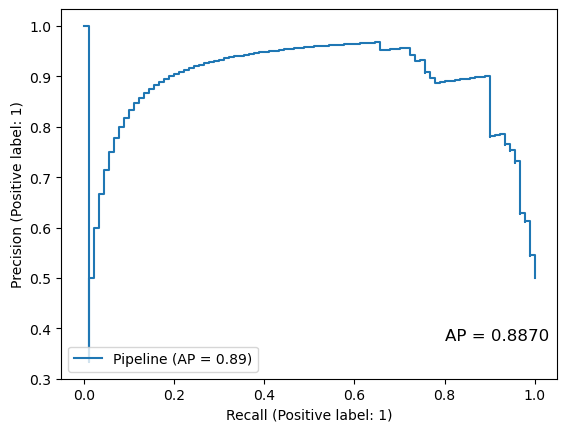

In [73]:
y_pred_proba = log_pipe.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_pred_proba)

PrecisionRecallDisplay.from_estimator(log_pipe, X_test, y_test)

plt.text(0.8, 0.4, f'AP = {average_precision:.4f}', fontsize=12, va='top', ha='left')
plt.show()

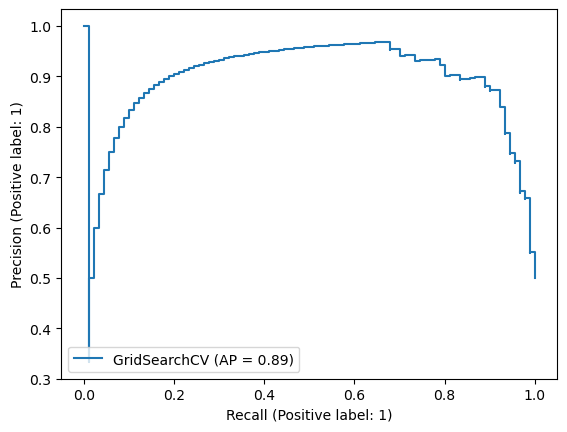

In [74]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

# plot_precision_recall_curve(grid_model, X_test, y_test);

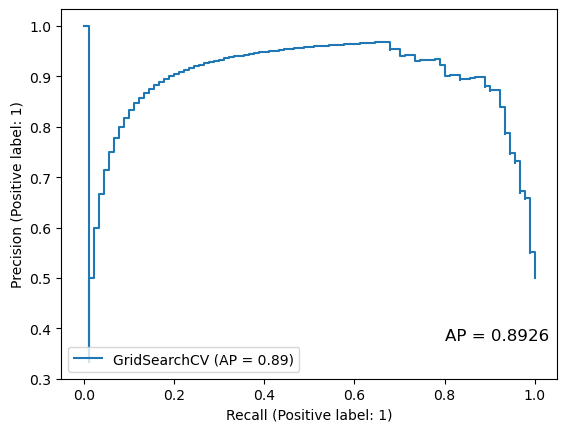

In [75]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_pred_proba)

PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

plt.text(0.8, 0.4, f'AP = {average_precision:.4f}', fontsize=12, va='top', ha='left')
plt.show()

# <font color='green'> <b>Prediction</b><font color='black'>

In [76]:
new_data = pd.read_excel("Raisin_Dataset_new.xlsx") 

In [77]:
final_scaler = StandardScaler()
final_model = LogisticRegression()

In [78]:
final_pipe = Pipeline([("scaler", final_scaler), ("log_model", final_model)])

In [79]:
final_pipe.fit(X, y)

# Modelinizi tüm veri setiyle eğitme

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [80]:
predictions = final_pipe.predict(new_data)

# Tahminde bulunun

In [81]:
positive_class_proba = final_pipe.predict_proba(new_data)[:, 1]

# Olasılıkları hesapla

In [82]:
results = pd.DataFrame({
    'Tahmin': predictions,
    'Pozitif Sınıf Olasılığı': positive_class_proba
})

results

# Tahmin sonuçlarını göster

Tahmin  Pozitif Sınıf Olasılığı
0       1                 0.651376
1       0                 0.132203
2       0                 0.086283
3       0                 0.024742
4       0                 0.123196
5       1                 0.572805
6       1                 0.743543
7       1                 0.728312
8       1                 0.863969
9       1                 0.938375

# <font color='green'> <b>Conclusion</b><font color='black'>